In [38]:
!pip install datasets
!pip install tensorflow

In [39]:

from datasets import load_dataset

dataset = load_dataset('cifar10')

Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/5da9550526dac91579c0df95a56466f78e62cc6ea1ccffd17f71f2e64aa86b5e)


  0%|          | 0/2 [00:00<?, ?it/s]

In [40]:
print(dataset['train'].shape)
dataset['test'].shape

(50000, 2)


(10000, 2)

In [41]:
dataset['train'].features

{'img': Array3D(shape=(32, 32, 3), dtype='uint8', id=None),
 'label': ClassLabel(num_classes=10, names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], names_file=None, id=None)}

In [42]:
dataset['train']['label'][0]

0

In [43]:
import tensorflow as tf

In [45]:
import numpy as np

# Convert dataset into ndarrays

(train_x, train_y), (test_x, test_y) = \
  (np.array(dataset['train']['img']), np.array(dataset['train']['label'])), \
  (np.array(dataset['test']['img']), np.array(dataset['test']['label']))

# Scale input image pixel values

train_x, test_x = train_x / 255.0, test_x / 255.0

In [46]:
train_x[0]

array([[[0.69803922, 0.69019608, 0.74117647],
        [0.69803922, 0.69019608, 0.74117647],
        [0.69803922, 0.69019608, 0.74117647],
        ...,
        [0.66666667, 0.65882353, 0.70588235],
        [0.65882353, 0.65098039, 0.69411765],
        [0.64705882, 0.63921569, 0.68235294]],

       [[0.70588235, 0.69803922, 0.74901961],
        [0.70196078, 0.69411765, 0.74509804],
        [0.70588235, 0.69803922, 0.74901961],
        ...,
        [0.67843137, 0.67058824, 0.71372549],
        [0.67058824, 0.6627451 , 0.70588235],
        [0.65882353, 0.65098039, 0.69411765]],

       [[0.69411765, 0.68627451, 0.7372549 ],
        [0.69411765, 0.68627451, 0.7372549 ],
        [0.69803922, 0.69019608, 0.74117647],
        ...,
        [0.67058824, 0.6627451 , 0.70588235],
        [0.6627451 , 0.65490196, 0.69803922],
        [0.65490196, 0.64705882, 0.69019608]],

       ...,

       [[0.43921569, 0.41960784, 0.41960784],
        [0.44313725, 0.42745098, 0.42352941],
        [0.44705882, 0

In [47]:
import os

def train_basic_cifar10_conv():

  # Define callbacks for early training stopping and model checkpointing

  class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if logs.get('acc') > 0.3:
        print("\nReached stopping point accuracy.")
        self.model.stop_training = True

  early_stop_callback = Callback()

  checkpoint_path = "cnn_1/model.ckpt"
  checkpoint_dir = os.path.dirname(checkpoint_path)

  checkpointing_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_path, save_weights_only=True, verbose=1)

  # Define and train very basic CNN

  model = tf.keras.models.Sequential([
      
      # Two 3x3 convolutions with 2x2 max pool
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', 
                            input_shape=(32, 32, 3)),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')

  ])

  # Equivalent method to define layer by layer

  # inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  # conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', 
  #                            input_shape=(32, 32, 3))(inputs)
  # mp1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
  # conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
  #                                padding='valid')(mp1)
  # mp2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
  # flatten = tf.keras.layers.Flatten()(mp2)
  # d1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
  # d2 = tf.keras.layers.Dense(10, activation='softmax')(flatten)

  # model = tf.keras.Model(inputs=inputs, outputs=d2)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=6, callbacks=[
    # early_stop_callback, checkpointing_callback])
    checkpointing_callback])

  # Return metrics
  return history.epoch, history.history['acc'][-1]


In [ ]:
_, _ = train_basic_cifar10_conv()

In [48]:
!pip install matplotlib

8

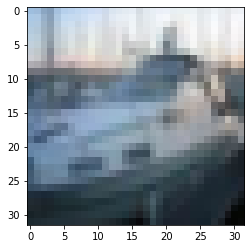

In [53]:
import matplotlib.pyplot as plt

plt.imshow(test_x[2])
test_y[2]

In [56]:
!zip -r /content/cnn1.zip /content/cnn_1

  adding: content/cnn_1/ (stored 0%)
  adding: content/cnn_1/model.ckpt.data-00000-of-00001 (deflated 18%)
  adding: content/cnn_1/checkpoint (deflated 42%)
  adding: content/cnn_1/model.ckpt.index (deflated 65%)


In [62]:
model.load_weights('cnn_1/model.ckpt')

In [64]:
model.evaluate(test_x, test_y, verbose=2)

313/313 - 3s - loss: 1.1191 - accuracy: 0.6038 - 3s/epoch - 10ms/step


[1.1191385984420776, 0.6037999987602234]